In [1]:
#Imported libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loaded DataSet
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")
train_df=pd.read_csv("/kaggle/input/titanic/train.csv")
GS_df=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
GS_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
test_df = pd.merge(test_df, GS_df, on='PassengerId', how='inner')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


#   ****Data preparation****

* Handle Missing Values
* Extract varaible 



In [7]:
#Handle Missing Values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df=train_df.dropna()
test_df=test_df.dropna()

In [9]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
# Extract varaibles
x_train= pd.DataFrame(train_df[['Pclass',"Age","SibSp",'Parch','Fare']])
y_train= pd.DataFrame(train_df["Survived"])

x_test= pd.DataFrame(test_df[['Pclass',"Age","SibSp",'Parch','Fare']])
y_test= pd.DataFrame(test_df["Survived"])


In [11]:
x_train

,Pclass,Age,SibSp,Parch,Fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,1,54.0,0,0,51.8625
10,3,4.0,1,1,16.7000
11,1,58.0,0,0,26.5500
...,...,...,...,...,...
871,1,47.0,1,1,52.5542
872,1,33.0,0,0,5.0000
879,1,56.0,0,1,83.1583
887,1,19.0,0,0,30.0000


In [12]:
y_train

,Survived
1,1
3,1
6,0
10,1
11,1
...,...
871,1
872,0
879,1
887,1


**Model Training**

In [13]:
from sklearn.tree import DecisionTreeClassifier  

classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Prediction**

In [14]:
x_train

,Pclass,Age,SibSp,Parch,Fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,1,54.0,0,0,51.8625
10,3,4.0,1,1,16.7000
11,1,58.0,0,0,26.5500
...,...,...,...,...,...
871,1,47.0,1,1,52.5542
872,1,33.0,0,0,5.0000
879,1,56.0,0,1,83.1583
887,1,19.0,0,0,30.0000


In [15]:

classifier.predict([[1,38.0,1,0,71.2833]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

**Test accuracy**

In [16]:
y_test.count()


Survived    87
dtype: int64

In [17]:
y_predict=classifier.predict(x_test)
y_predict=pd.DataFrame(y_predict)

y_predict.count()

0    87
dtype: int64

In [18]:

from sklearn.metrics import confusion_matrix as CM
from sklearn import metrics
cm=CM(y_test,y_predict)

In [19]:
cm

array([[13, 30],
       [10, 34]])

In [20]:
acc=metrics.accuracy_score(y_test,y_predict)
acc*100

54.02298850574713

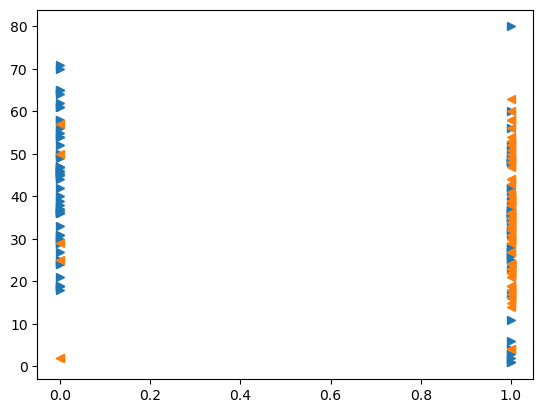

(88, 88)

In [21]:
import numpy as np

xpoints = train_df[train_df["Sex"]=="male"]['Survived']
ypoints = train_df[train_df["Sex"]=="male"]["Age"]

x1points = train_df[train_df["Sex"]!="male"]['Survived']
y1points = train_df[train_df["Sex"]!="male"]["Age"]

plt.plot(xpoints, ypoints,">")
plt.plot(x1points, y1points,"<")
plt.show()

train_df[train_df["Sex"]!="male"]['Survived'].count(),x1points.count()
# train_df.count()